<a href="https://colab.research.google.com/github/mikeonly/nma_easy_cabbage/blob/master/PCA Calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pcaplot
from sklearn.decomposition import PCA

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [14]:
%load_ext autoreload
%autoreload 2

In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [17]:
X = np.load('processed_data/bins_session11_b0.05.npy')

In [22]:
X.shape

(698, 50)

In [18]:
raw_labels = np.load('processed_data/labels11.npy')

In [19]:
cortex_areas, indexed_by_area = np.unique(raw_labels, return_inverse=True)

In [23]:
pca_model = PCA(n_components=50) # Initializes PCA
pca_model.fit(X) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# Perform PCA
scores = pca_model.transform(X)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


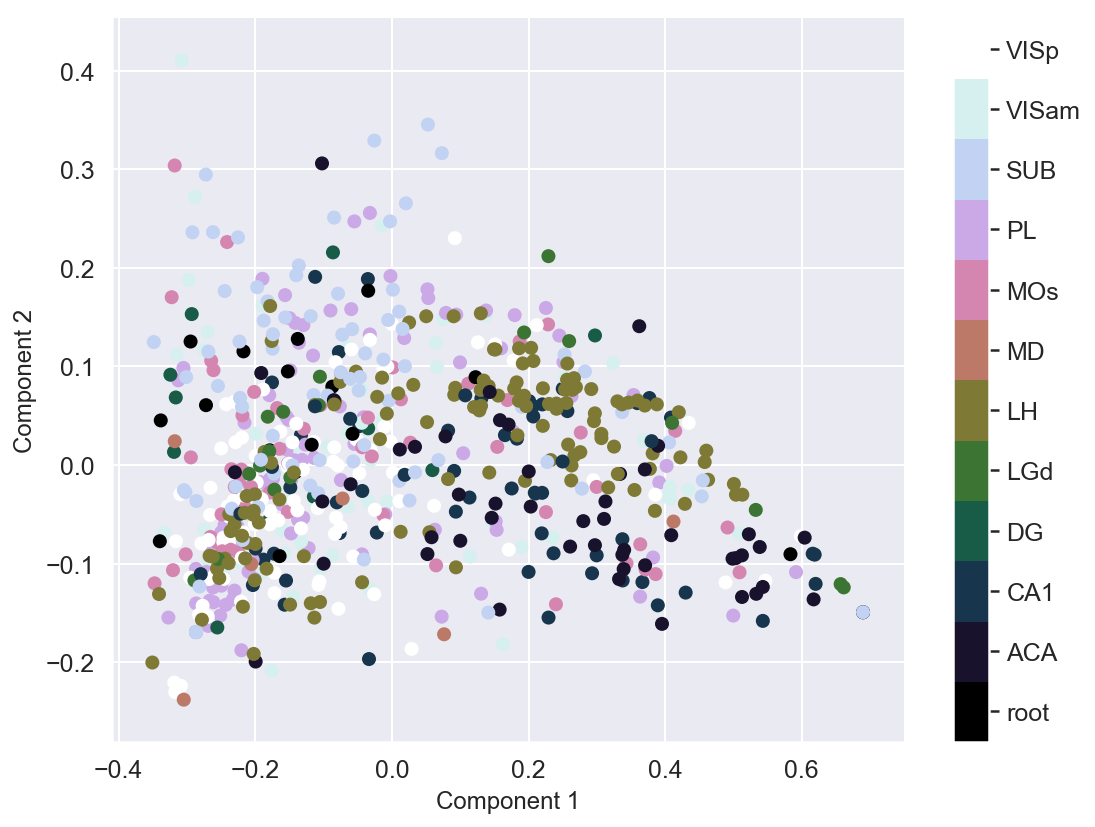

In [27]:
component1 = scores[:, 0]
component2 = scores[:, 1]

pcaplot.visualize_components(component1, component2, labels_index=indexed_by_area, labels=cortex_areas)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


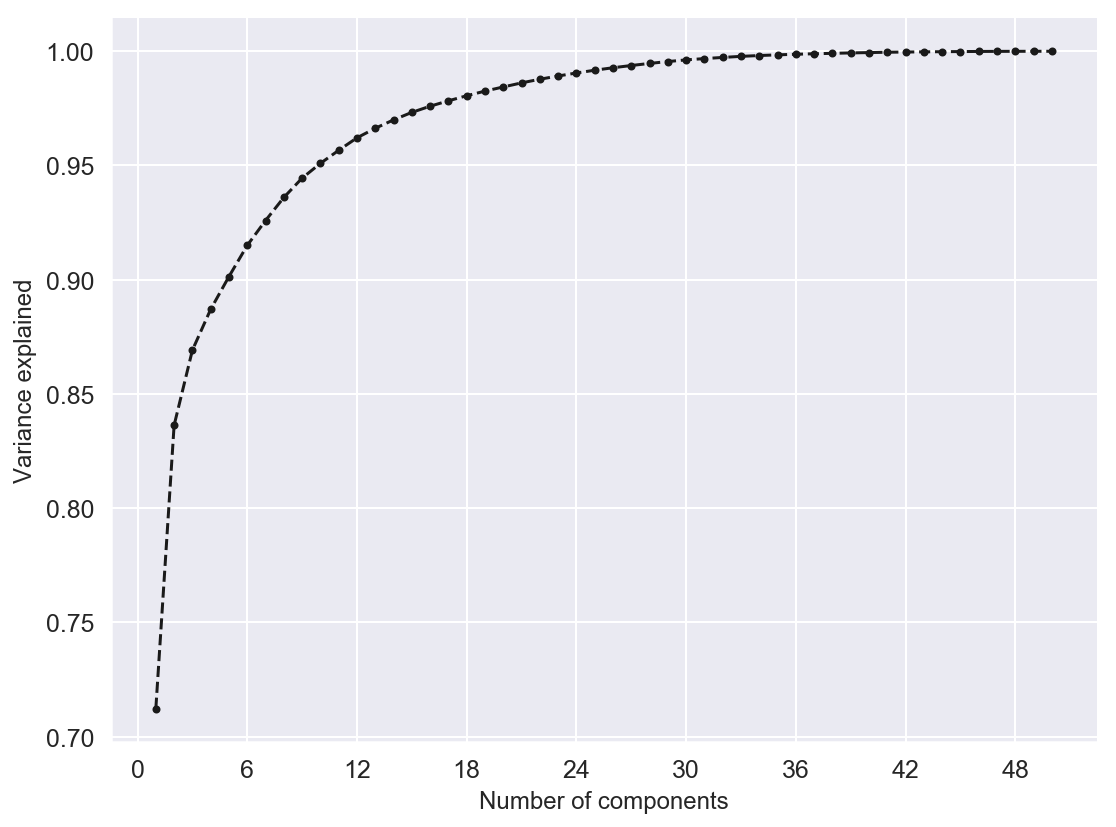

In [30]:
pcaplot.plot_variance_explained(pcaplot.get_variance_explained((pca_model.explained_variance_)))

Now let's try doing the same analysis, but with a different `binsize = 0.02`.

In [33]:
# Load bins from the preprocessed data
X002 = np.load('processed_data/bins_session11_b0.02.npy')

# Create and fit the model with the new data
pca_model = PCA(n_components=5) # Initializes PCA
pca_model.fit(X002) # Performs PCA 

scores = pca_model.transform(X002)

component1 = scores[:, 0]
component2 = scores[:, 1]

Plot the results.

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


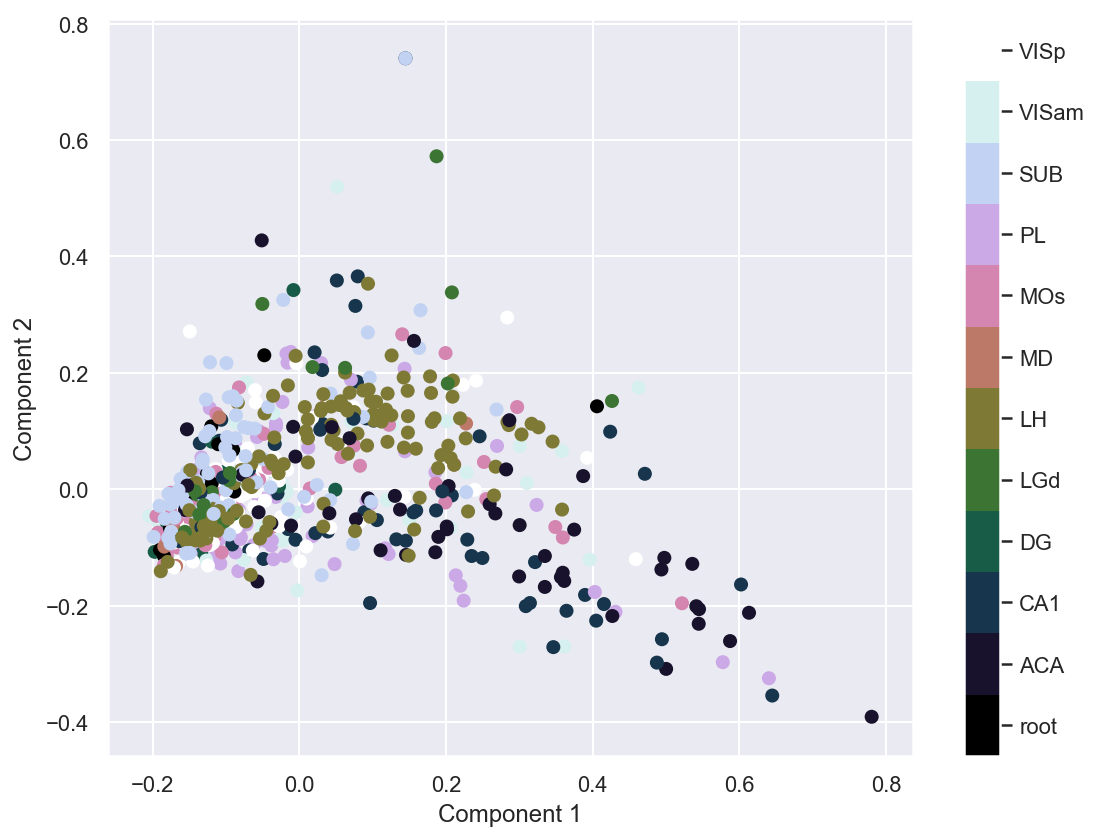

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


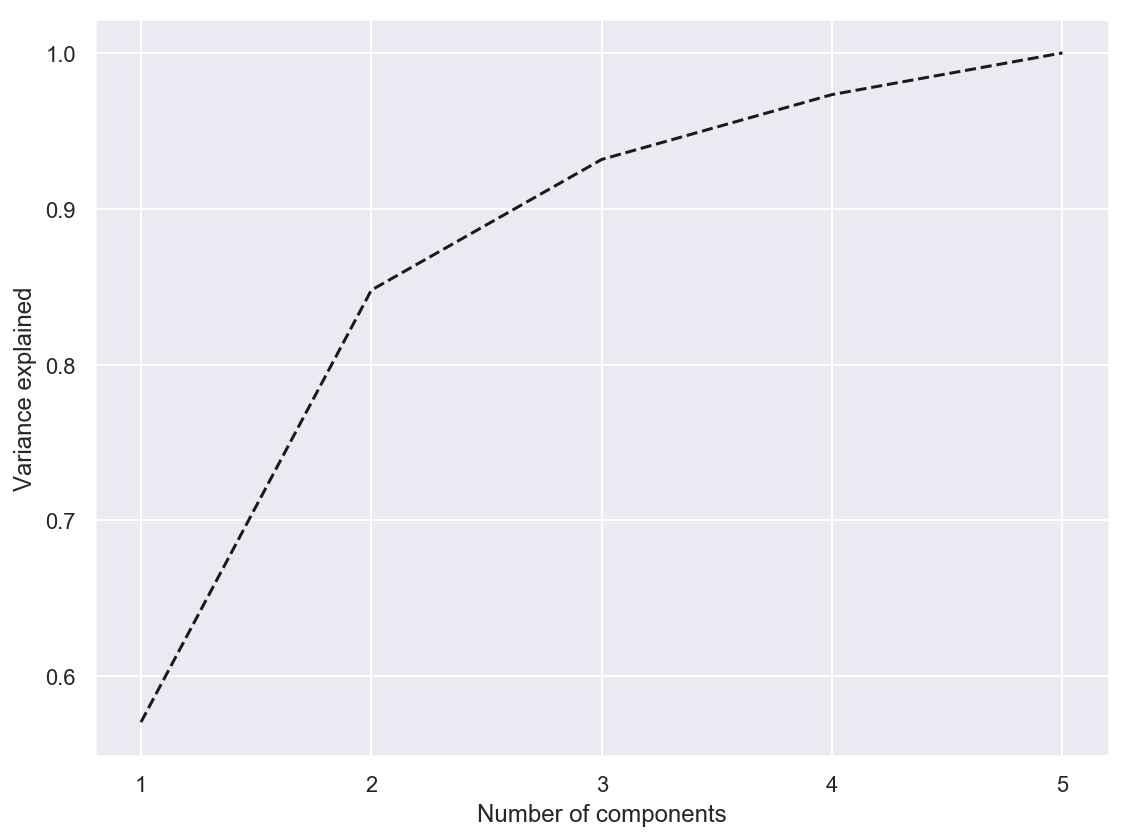

In [109]:
pcaplot.visualize_components(component1, component2, labels_index=indexed_by_area, labels=cortex_areas)
pcaplot.plot_variance_explained(pcaplot.get_variance_explained((pca_model.explained_variance_)))

## t-SNE FUN

In [35]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=10, random_state=1010) 

In [36]:
embed = tsne_model.fit_transform(X)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


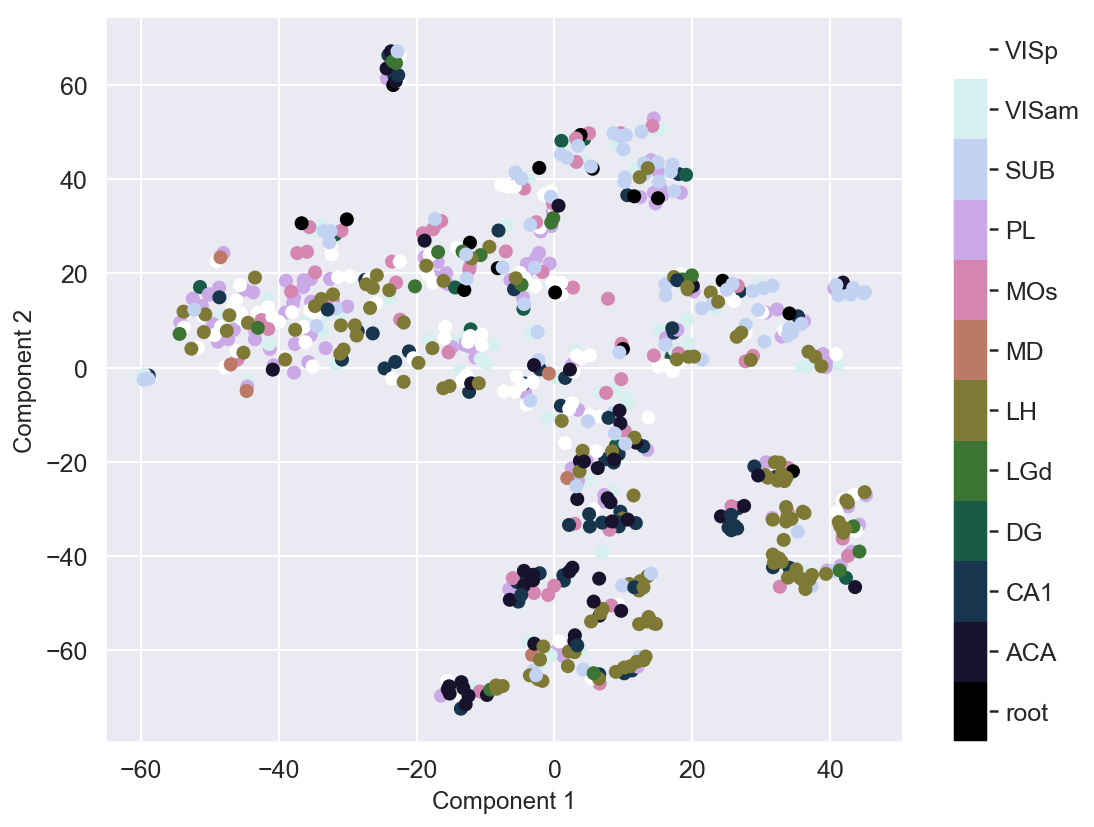

In [37]:
tsne_component1, tsne_component2 = [embed[:, 0], embed[:, 1]]
pcaplot.visualize_components(tsne_component1, tsne_component2, labels_index=indexed_by_area, labels=cortex_areas)

/Users/mikeonly/Anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


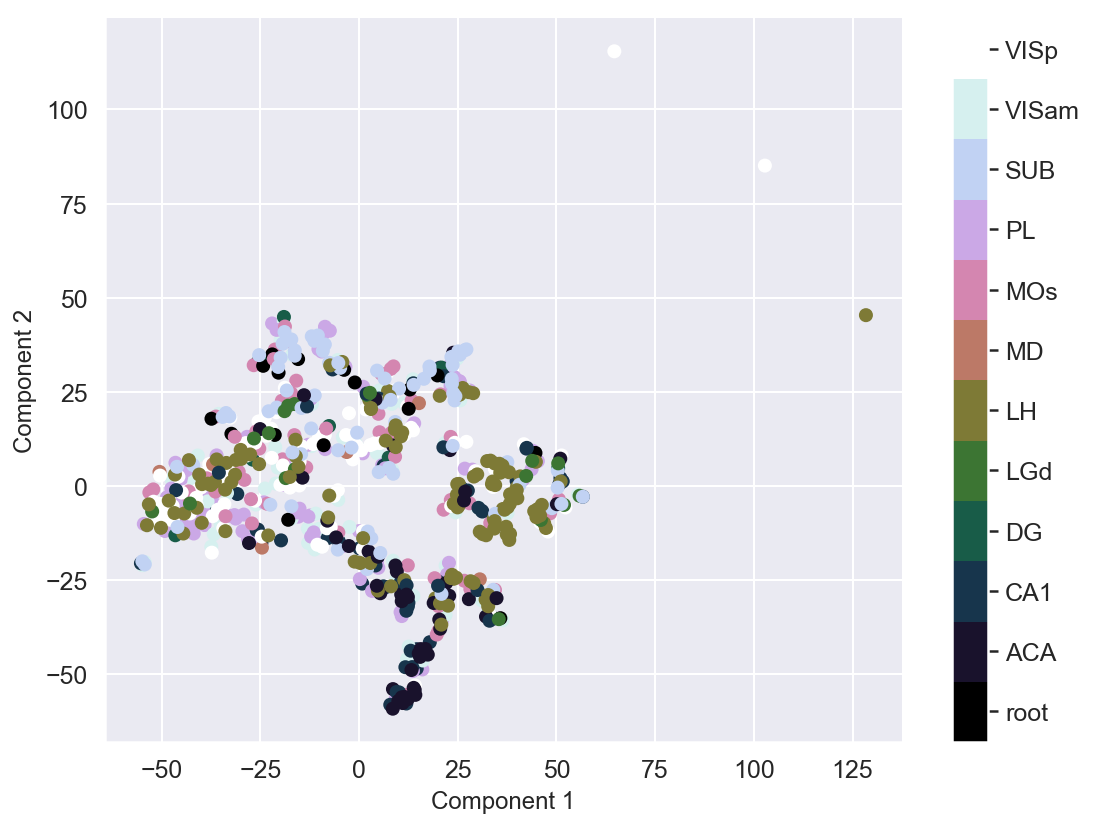

In [34]:
embed = tsne_model.fit_transform(X002)
tsne_component1, tsne_component2 = [embed[:, 0], embed[:, 1]]
pcaplot.visualize_components(tsne_component1, tsne_component2, labels_index=indexed_by_area, labels=cortex_areas)

In [40]:
X002.shape

(698, 125)

# KDE FUN

In [123]:
def normalize(number_array):
  n = float(np.sum(number_array))
  if not n:
    return number_array, n
  return number_array/n, n

def get_ISI_trial(spike):
  spike_times = np.array([])
  for t,s in enumerate(spike):
    for i in range(s):
      spike_times = np.hstack([spike_times, [t]])


  spike_intervals = np.diff(spike_times) * BIN_SIZE_DATA
  return spike_intervals

def get_ISI_neuron(neuron, trials):
  spike_intervals = np.array([])
  
  for trial in trials:
    spike = neuron[trial]
    spike_interval = get_ISI_trial(spike)
    spike_intervals = np.hstack([spike_intervals, spike_interval])
  return spike_intervals

In [11]:
all_dat[11]['ss']

KeyError: 'ss'

In [9]:
all_dat[10]['spks']

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 0, 2],
        ...,
        [0, 0, 0, ..., 